In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


## Remove the unwanted col name


In [6]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
#steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 4. Train test split
# 5. Train the model
# 6. Evaluate the model/model selection
# 7. Deploy the model

In [11]:
import matplotlib.pyplot as plt

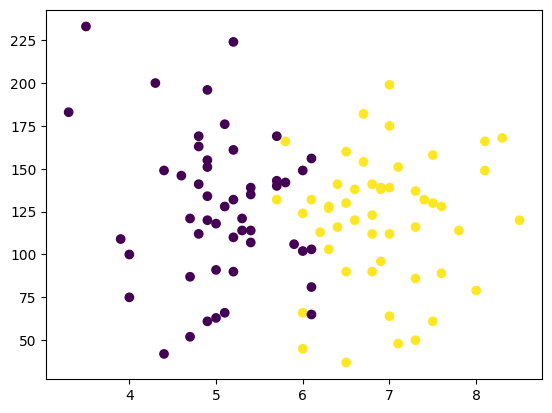

In [14]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement']);

In [25]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

## Train - Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [27]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [17]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [76]:
x_test

,cgpa,iq
25,5.0,91.0
3,7.4,132.0
8,6.1,156.0
73,4.9,61.0
40,4.9,134.0
23,4.7,87.0
79,6.5,90.0
64,7.0,64.0
37,8.1,149.0
47,5.2,161.0


In [77]:
y_train

81    0
39    0
57    1
6     0
59    0
     ..
20    1
61    1
2     0
13    1
51    0
Name: placement, Length: 80, dtype: int64

In [78]:
y_test

25    0
3     1
8     0
73    0
40    0
23    0
79    1
64    1
37    1
47    0
80    0
91    1
78    0
58    1
53    1
74    1
84    0
68    0
31    0
62    0
Name: placement, dtype: int64

## Scaling by PreProcessing using sklearn and StandardScaler

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()

In [81]:
x_train = scaler.fit_transform(x_train)

In [82]:
x_train

array([[-0.53185866, -0.4362945 ],
       [-1.26863257,  0.54868295],
       [ 0.48120546,  0.14458964],
       [-0.25556845,  0.47291546],
       [-1.08443909, -0.31001534],
       [-0.71605214, -0.360527  ],
       [-0.16347171,  0.44765962],
       [ 0.1128185 , -0.53731783],
       [-0.71605214,  2.51863786],
       [ 0.94168915, -0.31001534],
       [-1.17653583, -0.08271285],
       [-0.99234235,  0.77598544],
       [ 0.29701198, -0.53731783],
       [ 0.66539893,  1.45789291],
       [ 0.29701198,  0.06882214],
       [ 0.02072177, -1.47178362],
       [-0.16347171,  1.05379959],
       [ 1.21797936, -0.20899201],
       [-0.90024561, -1.54755111],
       [ 1.03378589,  0.67496211],
       [-0.71605214,  0.1951013 ],
       [-0.71605214, -0.86564365],
       [-0.53185866,  0.37189213],
       [-0.6239554 , -0.25950367],
       [ 1.40217284, -1.59806278],
       [ 1.21797936, -1.87587693],
       [-2.28169669,  2.74594035],
       [ 0.48120546,  0.9022646 ],
       [ 0.02072177,

In [83]:
x_test = scaler.transform(x_test)

In [84]:
x_test

array([[-0.90024561, -0.84038781],
       [ 1.3100761 ,  0.1951013 ],
       [ 0.1128185 ,  0.80124127],
       [-0.99234235, -1.59806278],
       [-0.99234235,  0.24561297],
       [-1.17653583, -0.94141114],
       [ 0.48120546, -0.86564365],
       [ 0.94168915, -1.52229528],
       [ 1.95475327,  0.62445045],
       [-0.71605214,  0.92752043],
       [-0.99234235,  1.81147456],
       [ 1.40217284,  0.85175294],
       [ 0.1128185 , -1.09294613],
       [ 1.86265653, -1.1434578 ],
       [ 2.13894674,  1.10431126],
       [ 0.66539893,  0.75072961],
       [-0.25556845,  1.12956709],
       [-1.821213  , -1.24448113],
       [-1.91330973, -0.38578284],
       [ 0.02072177, -0.56257366]])

## Model Training

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
clf = LogisticRegression()

In [88]:
#model training
clf.fit(x_train,y_train)

LogisticRegression()

## Model Evaluation

In [89]:
y.pred = clf.predict(x_test)

In [90]:
y_test

25    0
3     1
8     0
73    0
40    0
23    0
79    1
64    1
37    1
47    0
80    0
91    1
78    0
58    1
53    1
74    1
84    0
68    0
31    0
62    0
Name: placement, dtype: int64

## Model Prediction & Accuracy Score

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(y_test,y.pred)

0.85

In [93]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

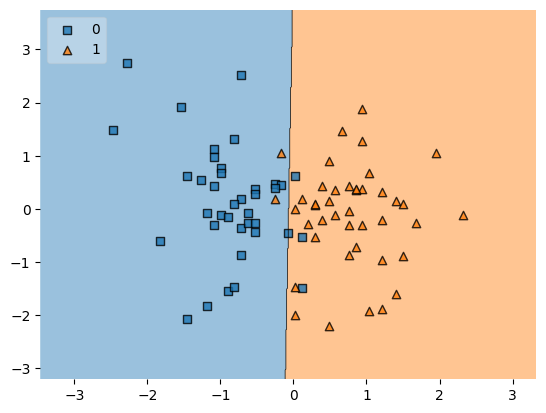

In [98]:
# Plotting decision regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

## Exporting the Model

In [99]:
import pickle

In [100]:
pickle.dump(clf,open('model.pkl', 'wb'))